Before you turn this homework in, make sure everything runs as expected. First, **restart the kernel** and then **run all cells** (in the menubar, select Kernel$\rightarrow$Restart \& Run all). If you get error messages, the grader will get the same errors and won't be able to grade your work. 

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". You may delete the line(s) that say "**raise** NotImplementedError()" and replace them with your actual work. Write all your work in the cells provided in this notebook. **DO NOT** add or delete any cells. 

Please fill in your name in the cell below.

In [ ]:
NAME = "Kevin Pham"

---

# Homework 7

**Disclaimer:** For this assignment, there are some things that you are asked to do that we have not explicitly done in class. 
For example, you will be asked to modify figures in Matplotlib in new ways. Please use your favorite search engine to look up how to do these things. Realistically, when you use Python in your jobs in the future you will be spending a significant portion of your time to look up new things. And it's never too early to practice that skill. 

## Problem

You can find the data files "Mouse_metadata.csv" and "Study_results.csv" which you will need for this homework on Canvas. You are being asked to create several graphs in this HW. You can find examples of what your graphs are suppose to look like in the additional graph document you can find on Canvas. 

In a pharmaceutical study, 249 mice identified with squamous cell carcinoma (skin cancer) tumor growth were treated with a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The scientists measured the tumor growth over time (volume in $mm^3$) and the number of metastatic sites. The purpose of the study was to compare the performace of the new drug "Capomulin" to several other existing drug regimens. 

Begin by loading the two data sets into Pandas as data frames. 

In [293]:
# COMPLETE
# YOUR CODE HERE
# queue in appropriate libraries
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt

# queue in data
meta_df = pd.read_csv("Mouse_metadata.csv")
result_df = pd.read_csv( "Study_results.csv")
display(meta_df)
display(result_df)

meta_df.columns # show just the columns of the meta data
result_df.columns # show just the colunms of the result data
# raise NotImplementedError()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,s185,Capomulin,Female,3,17
1,x401,Capomulin,Female,16,15
2,m601,Capomulin,Male,22,17
3,f966,Capomulin,Male,16,17
4,u364,Capomulin,Male,18,17
...,...,...,...,...,...
244,q633,Zoniferol,Male,12,25
245,s337,Zoniferol,Male,14,27
246,w140,Zoniferol,Female,19,30
247,w575,Zoniferol,Female,16,28


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,0,45.000000,0
1,a203,5,48.508468,0
2,a203,10,51.852437,1
3,a203,15,52.777870,1
4,a203,20,55.173336,1
...,...,...,...,...
1882,z969,25,63.145652,2
1883,z969,30,65.841013,3
1884,z969,35,69.176246,4
1885,z969,40,70.314904,4


Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

(a) Describe the two data files. How many rows and columns are in each file? What variables are in the columns? What is in the rows? What is the Pandas index currently used? Do the two files have any common columns?

For the 'Mouse Metadata' we have 249 rows with 5 columns with the following column variables: Mouse ID, Drug Regimen, Sex, Age_months, and Weight (g). Each row represents a unique entry per mouse. The current index is just the default indices starting with 0 and ending with 248.

For the 'Study_results' we have 1887 rows with 4 columns with the following column variables: Mouse ID, Timepoint, Tumor Volume (mm3), and Metastatic Sites. Each row per up to 10 total rows shows incremented Timepoint results to 'Tumor Volume (mm3)' per each unique 'Mouse ID'. The current index is using the default indices

Between the two files, there are no common columns.

(b) Write Pandas code to find the number of male and female mice that were subjected to each drug regimen. Save the results as a Pandas data frame with the names of the drugs as the index and two columns (one for male, one for female). The two columns should contain the counts of individuals subjected to each drug regimen. Display your resulting data frame to the console so that the grader can see it. 

In [138]:
# COMPLETE
# YOUR CODE HERE
# Find number of male and female mice that were subjected to each regimen

# indices = Drug Regimen
meta_df.set_index('Drug Regimen', inplace = True)
# empty list to collect the counts of each drug regimen for each sex
male = []
female = []


for i in set(meta_df.index): # traverse through each treatment
    male.append(len(meta_df[meta_df['Sex'] == 'Male'].loc[i])) # append each count of each treatment for males by finding length of their sliced dataframe
    female.append(len(meta_df[meta_df['Sex'] == 'Female'].loc[i])) # append each count of each treatment for females by finding length of their sliced dataframe

new = pd.DataFrame({"Male": male, "Female": female}, index = set(meta_df.index)) # queue into new dataframe with modified indices being the 'Drug Regimen'
display(new) # display it




# raise NotImplementedError()

,Male,Female
Propriva,13,12
Infubinol,13,12
Naftisol,12,13
Ceftamin,12,13
Ketapril,16,9
Ramicane,16,9
Stelasyn,9,15
Capomulin,12,13
Placebo,12,13
Zoniferol,10,15


(c) Use Matplotlib to create a side-by-side bar plot that shows the numbers of males and females under each drug regimen. Make sure to label your plot (label the bar groups with the names of the drugs, create a legend, label the y-axis and title your plot). Use different colors for males (blue) and females (red). Look up how to rotate axis lables (to make all the drug names readable). 

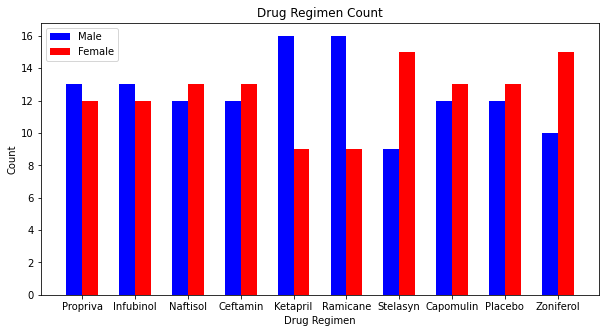

In [166]:
# COMPLETE
# YOUR CODE HERE
x_pos = range(len(male)); # spacing between each unique drug

# apply graph cosmetics

plt.figure(figsize = (10,5)); # predetermined shape for the bar graph
plt.bar(x_pos, male, width = -0.3, align = 'edge', label='Male', color = 'blue'); # graph the males
plt.bar(x_pos, female, width = 0.3, align = 'edge', label='Female', color = 'red'); # graph the females

plt.ylabel('Count'); # y-axis labels
plt.xlabel('Drug Regimen'); # x-axis labels
plt.title('Drug Regimen Count'); # add a title
plt.legend(); # add a legend

plt.xticks(x_pos,new.index); # labels for each bar


# raise NotImplementedError()

(d) Use Pandas to find the average tumor size for each drug regimen, separately at each time-point. Store your results in a Pandas data frame with time point as the index and ten columns (one column per drug regimen). Display your resulting data frame using a print statement. 

**Hint:** Recall, that ```unstack()``` is the opposite of the ```melt()``` procedure. Read up on details in either your text or on the Python documentation website. 

In [289]:
# COMPLETE*
# YOUR CODE HERE
# IMPLEMENT STACK
# Each timepoint will have their own average and timepoint will also be the indices
# make a new DF with relevant info, use their IDs to match their treatment

data = pd.merge(meta_df.loc[:, ['Mouse ID', 'Drug Regimen']], 
                     result_df.loc[:, ['Mouse ID','Timepoint', 'Tumor Volume (mm3)']]) # This only works because of the common columns
# it will extend the shortened information to match the long one.
# df.loc[:, [columns]] # whatever row, specific columns INDEX, so still using indices
data_grouped = data.groupby(['Timepoint','Drug Regimen']) # group it by relevant info

tumor_size = data_grouped['Tumor Volume (mm3)'].mean().unstack() # take the mean of each respective timepoints then unstack
print(tumor_size)
#raise NotImplementedError()

Drug Regimen  Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol  \
Timepoint                                                             
0             45.000000  45.000000  45.000000  45.000000  45.000000   
5             44.266086  46.503051  46.541247  47.389175  46.796098   
10            43.084291  48.285125  49.403909  49.582269  48.694210   
15            42.064317  50.094055  51.296397  52.399974  50.933018   
20            40.716325  52.157049  53.197691  54.920935  53.644087   
25            39.939528  54.287674  55.715252  57.678982  56.731968   
30            38.769339  56.769517  58.299397  60.994507  59.559509   
35            37.816839  58.827548  60.742461  63.371686  62.685087   
40            36.958001  61.467895  63.162824  66.068580  65.600754   
45            36.236114  64.132421  65.755562  70.662958  69.265506   

Drug Regimen    Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                            
0      

(e) Use Matplotlib to create a line-graph of the average tumor size as a function of time for each drug regimen. Include all ten drugs in the same plot and use different colors for different drugs. Make sure to label your plot (include x- and y-axis labels, title, legend for which curve belongs to which drug). Please place the legend outside the plot (you should look up how to do this).

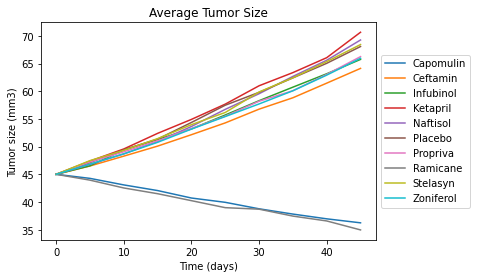

In [290]:
#
# set-up for axis
ax = plt.axes()
x_axis = tumor_size.index # horizontal axis units

# each individual column should be traversed through
for i in tumor_size.columns:
    y = tumor_size.loc[:,i] # for each col entry
    ax.plot(x_axis,y,label=i) # plot it for each col label

# graph cosmetics

# x and y labels
plt.xlabel('Time (days)'); 
plt.ylabel('Tumor size (mm3)');

# add a title
plt.title('Average Tumor Size');

# add a legend
plt.legend(loc = 'center left', bbox_to_anchor = (1,0.5));
# YOUR CODE HERE
# raise NotImplementedError()

(f) Use Pandas to create a Data Frame that has one row per mouse, index values should be Mouse IDs, and has exactly the following columns: "Weight" (initial mouse weight in grams), "Sex", "Age" (of mouse at the beginning of trial in months), "Tumor" (tumor volume on day 45 - include only mice who lived until day 45), "Drug Regimen". Display your resulting data frame using a print statement. 

In [301]:
# COMPLETE
# YOUR CODE HERE
# Merge the data with the relevant col variables using 'Mouse ID' as the key 
prob_df = pd.merge(meta_df.loc[:, ['Mouse ID', 'Weight (g)', 'Sex', 'Age_months', 'Drug Regimen']], 
                     result_df.loc[result_df['Timepoint'] ==45, ['Mouse ID','Tumor Volume (mm3)']], on = "Mouse ID")

# Rename the column names and set the index to match 
prob_df.rename(columns = {'Mouse ID':'Mouse ID', 'Weight (g)':'Weight', 'Sex':'Sex', 'Age_months':'Age', 'Tumor Volume (mm3)':'Tumor', 
                            'Drug Regimen':'Drug Regimen'},inplace = True)
prob_df.set_index(["Mouse ID"], inplace = True)

# Rearrange the columns correctly
prob_df = prob_df[['Weight', 'Sex', 'Age', 'Tumor', 'Drug Regimen']]

print(prob_df)
# raise NotImplementedError()

          Weight     Sex  Age      Tumor Drug Regimen
Mouse ID                                             
s185          17  Female    3  23.343598    Capomulin
x401          15  Female   16  28.484033    Capomulin
m601          17    Male   22  28.430964    Capomulin
u364          17    Male   18  31.023923    Capomulin
y793          17    Male   17  31.896238    Capomulin
...          ...     ...  ...        ...          ...
p136          28  Female    5  63.488697    Zoniferol
q511          28  Female    2  68.611061    Zoniferol
q633          25    Male   12  70.827796    Zoniferol
s337          27    Male   14  62.109651    Zoniferol
w575          28  Female   16  68.401286    Zoniferol

[130 rows x 5 columns]


(g) Use Matplotlib to create a scatterplot of final tumor size on day 45 against initial mouse weight for the mice who survived until day 45. Use different colors for different drug treatments. Make sure to label your plot (include x- and y-axis labels, title, and a legend for which color belongs to which drug). Please place the legend outside the plot. 

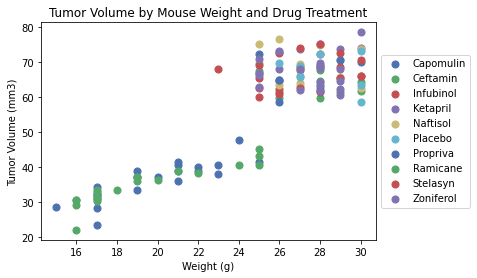

In [303]:
# COMPLETE
# YOUR CODE HERE
prob_df = pd.merge(meta_df.loc[:, ['Mouse ID', 'Weight (g)','Drug Regimen']], 
                     result_df.loc[result_df['Timepoint'] ==45, ['Mouse ID','Tumor Volume (mm3)']], on = "Mouse ID")

treat = prob_df['Drug Regimen'].unique() # each of the unique drugs studied
plt.style.use('seaborn-deep') # set the theme for the plot

# For each of the treatment under study we will plot those points on the scatterplot with it's own label and color
for i in range(len(treat)):
    x = prob_df.loc[prob_df['Drug Regimen'] == treat[i],:]['Weight (g)']
    y = prob_df.loc[prob_df['Drug Regimen'] == treat[i],:]['Tumor Volume (mm3)']
    plt.scatter(x, y, label=treat[i], alpha = 1, s = 50)

# graph cosmetics
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume by Mouse Weight and Drug Treatment')    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
# raise NotImplementedError()

(h) Comment on what you see in the plot you just created. Do the mice seem to have been randomly assigned to the treatments? 

It appears that the mice were not randomly assigned treatments. Mice that weighed less were all prescribed Capomulin and Ramicane, while larger mice were prescribed the other drugs. 

The mice with lower weights ended up having smaller tumors but it's difficult to discern how much of this is due to the drugs and how much of it is due to their initial weight. 

We can see that within the group of mice receiving Capomulin and Ramican, larger mice ended up with larger tumors, which indicate that initial weight likely had an effect on tumor size which means that we should not be comparing the smaller mice's treatment to the larger mice's treatment.

(i) Create a side-by-side boxplot for initial mouse weight across drug regimens. Order the drugs, so that the boxplots for the drugs "Capomulin" and "Ramicane" appear on the left. 

**Note:** Look at the [matplotlib gallery](https://matplotlib.org/stable/gallery/index.html) and scroll down to the "Statistics" section to understand how to create a side-by-side boxplot. 

**Hint:** start with a list of lists of values you want to plot. 

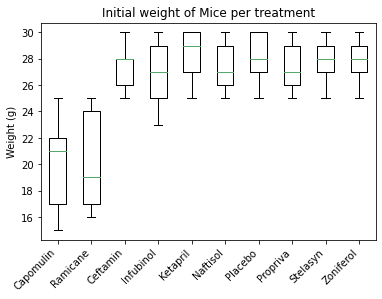

In [305]:
# COMPLETE
# YOUR CODE HERE
# correct order of drugs
ordered_drugs = ['Capomulin', 'Ramicane', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Stelasyn', 'Zoniferol']

# Create a dictionary where each drug is the key and each value is a list of weights associated with that drug
drug_dict = {drug:list(meta_df.loc[meta_df['Drug Regimen'] == drug]['Weight (g)']) for drug in ordered_drugs}

# Plot the boxplot using the dictionary keys as the x labels
ax = plt.axes() 
ax.boxplot(drug_dict.values())
ax.set_xticklabels(drug_dict.keys());

# graph cosmetics
plt.ylabel('Weight (g)'); 
plt.title('Initial weight of Mice per treatment')
plt.xticks(ha = 'right', rotation = 45);

# raise NotImplementedError()